In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [3]:
df=pd.read_csv("311-2014.csv", nrows=200000)

/home/sean/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dateutil.parser.parse(df['Created Date'][0])

datetime.datetime(2015, 7, 6, 10, 58, 27)

In [5]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

In [6]:
df['created_datetime']=df['Created Date'].apply(parse_date)

In [7]:
df.index=df['created_datetime']

What was the **most popular type of complaint**, and how many times was it filed?

In [8]:
df['Complaint Type'].describe()

count               200000
unique                 180
top       Blocked Driveway
freq                 21779
Name: Complaint Type, dtype: object

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

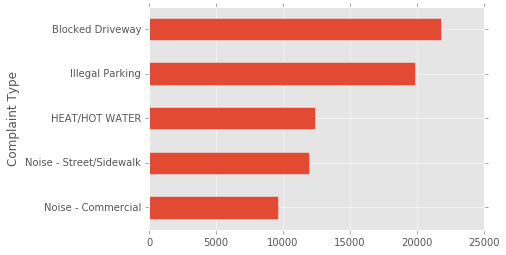

In [9]:
df.groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5).plot(kind='barh').invert_yaxis()

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [10]:
df.groupby(by='Borough')['Borough'].count()

Borough
BRONX            29610
BROOKLYN         57129
MANHATTAN        42050
QUEENS           46824
STATEN ISLAND     7387
Unspecified      17000
Name: Borough, dtype: int64

In [11]:
boro_pop={
    'BRONX': 1438159,
    'BROOKLYN': 2621793,
    'MANHATTAN': 1636268,
    'QUEENS': 2321580,
    'STATEN ISLAND': 473279}


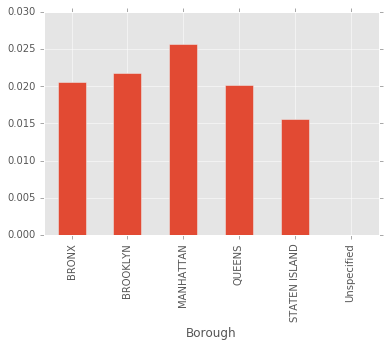

In [12]:
boro_df=pd.Series.to_frame(df.groupby(by='Borough')['Borough'].count())
boro_df['Population']=pd.DataFrame.from_dict(boro_pop, orient='index')
boro_df['Complaints']=boro_df['Borough']
boro_df.drop('Borough', axis=1, inplace=True)
boro_df['Per Capita']=boro_df['Complaints']/boro_df['Population']
boro_df['Per Capita'].plot(kind='bar')

According to your selection of data, **how many cases were filed in March?** How about May?

In [13]:
df['2015-03']['Created Date'].count()

15025

In [14]:
df['2015-05']['Created Date'].count()

49715

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [15]:
df['2015-04-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

In [16]:
df['2015-04-01'].groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(1)

Complaint Type
Illegal Parking    67
Name: Complaint Type, dtype: int64

What were the **most popular three types of complaint** on April 1st

In [17]:
df['2015-04-01'].groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(3)

Complaint Type
Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

In [18]:
df.resample('M')['Unique Key'].count().sort_values(ascending=False)

created_datetime
2015-05-31    49715
2015-10-31    24700
2015-04-30    20087
2015-11-30    16476
2015-07-31    15047
2015-03-31    15025
2015-06-30    14459
2015-09-30    13679
2015-08-31    12204
2015-02-28     8141
2015-01-31     7091
2015-12-31     3373
2016-01-31        3
Name: Unique Key, dtype: int64

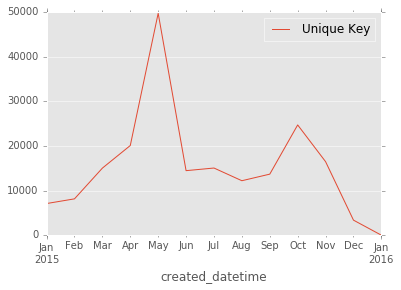

In [19]:
df.resample('M').count().plot(y='Unique Key')

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [20]:
df.resample('W')['Unique Key'].count().sort_values(ascending=False).head(5)

created_datetime
2015-05-10    13559
2015-05-17    11683
2015-05-24    10351
2015-05-03    10184
2015-05-31     9387
Name: Unique Key, dtype: int64

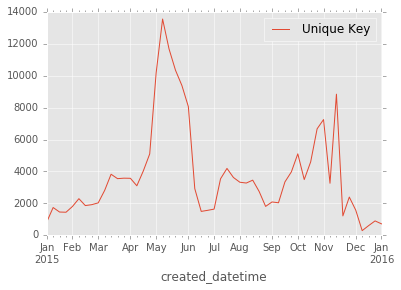

In [21]:
df.resample('W').count().plot(y='Unique Key')

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

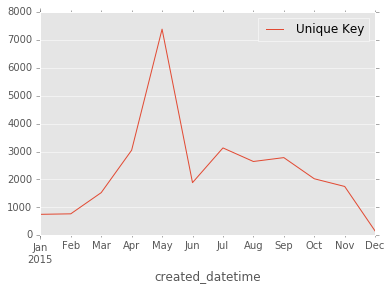

In [32]:
noise_df=df[df['Complaint Type'].str.contains('Noise')]
noise_df.resample('M').count().plot(y='Unique Key')

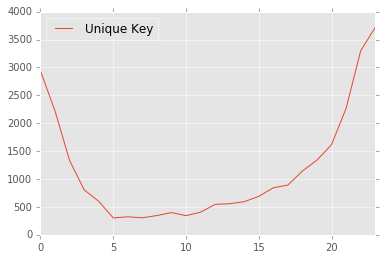

In [39]:
noise_df.groupby(by=noise_df.index.hour).count().plot(y='Unique Key')

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [42]:
df.resample('D')['Unique Key'].count().sort_values(ascending=False).head(5)

created_datetime
2015-10-28    2697
2015-11-09    2529
2015-05-04    2465
2015-05-11    2293
2015-10-29    2258
Name: Unique Key, dtype: int64

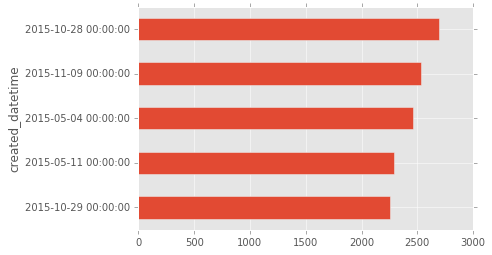

In [47]:
df.resample('D')['Unique Key'].count().sort_values().tail(5).plot(kind='barh')

**What hour of the day are the most complaints?** Graph a day of complaints.

In [74]:
df['Unique Key'].groupby(by=df.index.hour).count().sort_values(ascending=False)

0     22427
11    12729
12    12469
10    12343
13    11745
9     11490
15    11454
14    11205
16    10966
17     9291
18     8965
8      8157
22     8085
21     7658
19     7636
23     7420
20     7322
7      4992
1      3927
6      2687
2      2400
3      1644
5      1528
4      1460
Name: Unique Key, dtype: int64

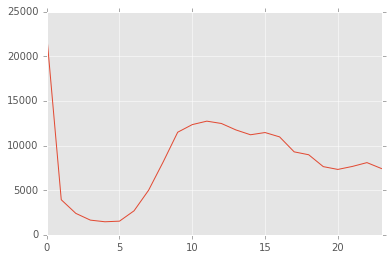

In [51]:
df['Unique Key'].groupby(df.index.hour).count().plot()

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [71]:
df[df.index.hour==0].groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
HEAT/HOT WATER          4534
Rodent                  2112
PAINT/PLASTER           1946
UNSANITARY CONDITION    1820
PLUMBING                1502
Name: Complaint Type, dtype: int64

In [72]:
df[df.index.hour==1].groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Illegal Parking             400
Noise - Vehicle             249
Name: Complaint Type, dtype: int64

In [73]:
df[df.index.hour==11].groupby(by='Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
Illegal Parking      1184
Blocked Driveway     1170
Street Condition      694
Broken Muni Meter     596
Graffiti              566
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

In [112]:
midnight_df = df[df.index.hour==0]

In [113]:
midnight_df.groupby(midnight_df.index.minute)['Unique Key'].count().sort_values(ascending=False)

0     17116
50      112
1       109
21      109
40      108
6       106
7       106
4       106
39      106
22      104
11      101
12      100
20      100
25      100
15      100
13      100
3        99
33       98
44       97
8        95
41       95
5        94
27       94
28       94
17       93
46       93
19       93
23       92
18       91
2        91
38       91
30       89
31       89
35       89
10       89
56       89
43       89
14       88
29       87
32       87
52       85
26       84
37       84
53       83
16       83
48       82
9        82
45       81
59       80
24       79
36       78
34       77
57       76
47       76
51       75
42       72
49       70
54       70
58       61
55       60
Name: Unique Key, dtype: int64

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

In [120]:
df.groupby('Agency')['Unique Key'].count().sort_values(ascending=False).head(5)

Agency
NYPD     80000
HPD      39388
DOT      22308
DPR      15505
DOHMH     8250
Name: Unique Key, dtype: int64

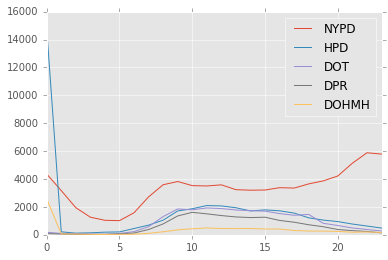

In [139]:
ax=df[df['Agency']=='NYPD'].groupby(df[df['Agency']=='NYPD'].index.hour)['Unique Key'].count().plot(legend=True, label='NYPD')
df[df['Agency']=='HPD'].groupby(df[df['Agency']=='HPD'].index.hour)['Unique Key'].count().plot(ax=ax, legend=True, label='HPD')
df[df['Agency']=='DOT'].groupby(df[df['Agency']=='DOT'].index.hour)['Unique Key'].count().plot(ax=ax, legend=True, label='DOT')
df[df['Agency']=='DPR'].groupby(df[df['Agency']=='DPR'].index.hour)['Unique Key'].count().plot(ax=ax, legend=True, label='DPR')
df[df['Agency']=='DOHMH'].groupby(df[df['Agency']=='DOHMH'].index.hour)['Unique Key'].count().plot(ax=ax, legend=True, label='DOHMH')

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

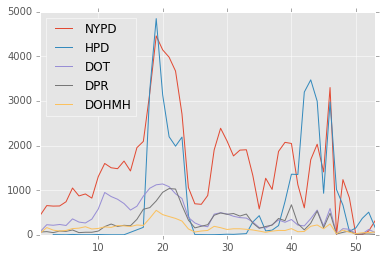

In [141]:
ax=df[df['Agency']=='NYPD'].groupby(df[df['Agency']=='NYPD'].index.week)['Unique Key'].count().plot(legend=True, label='NYPD')
df[df['Agency']=='HPD'].groupby(df[df['Agency']=='HPD'].index.week)['Unique Key'].count().plot(ax=ax, legend=True, label='HPD')
df[df['Agency']=='DOT'].groupby(df[df['Agency']=='DOT'].index.week)['Unique Key'].count().plot(ax=ax, legend=True, label='DOT')
df[df['Agency']=='DPR'].groupby(df[df['Agency']=='DPR'].index.week)['Unique Key'].count().plot(ax=ax, legend=True, label='DPR')
df[df['Agency']=='DOHMH'].groupby(df[df['Agency']=='DOHMH'].index.week)['Unique Key'].count().plot(ax=ax, legend=True, label='DOHMH')

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [142]:
nypd=df[df['Agency']=='NYPD']

In [157]:
nypd[(nypd.index.month==7) | (nypd.index.month==8)].groupby('Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
Illegal Parking            3444
Blocked Driveway           3258
Noise - Street/Sidewalk    3165
Noise - Commercial         1201
Noise - Vehicle             942
Name: Complaint Type, dtype: int64

In [158]:
nypd[nypd.index.month==5].groupby('Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
Blocked Driveway           4114
Illegal Parking            3975
Noise - Street/Sidewalk    3385
Noise - Commercial         2263
Noise - Vehicle            1232
Name: Complaint Type, dtype: int64

In [ ]:
# seems like mostly noise complaints and bad parking to me

In [159]:
hpd=df[df['Agency']=='HPD']

In [162]:
hpd[(hpd.index.month>=6) & (hpd.index.month<=8)].groupby('Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)
# i would consider summer to be june to august.

Complaint Type
HEAT/HOT WATER            617
UNSANITARY CONDITION      510
HPD Literature Request    462
PAINT/PLASTER             444
PLUMBING                  309
Name: Complaint Type, dtype: int64

In [163]:
hpd[(hpd.index.month==12) | (hpd.index.month<=2)].groupby('Complaint Type')['Complaint Type'].count().sort_values(ascending=False).head(5)

Complaint Type
HEAT/HOT WATER          353
UNSANITARY CONDITION    190
PLUMBING                139
PAINT/PLASTER           139
DOOR/WINDOW             103
Name: Complaint Type, dtype: int64

In [ ]:
# pretty similar list, but people probably notice a draft from their bad window or door in the winter more easily than summer